In [28]:
# creat raw info and montage from scratch

# # https://mne.tools/dev/auto_tutorials/intro/40_sensor_locations.html#sphx-glr-auto-tutorials-intro-40-sensor-locations-py

# https://mne.tools/stable/generated/mne.channels.DigMontage.html#mne.channels.DigMontage

# https://mne.tools/stable/auto_tutorials/simulation/10_array_objs.html#sphx-glr-auto-tutorials-simulation-10-array-objs-py

In [29]:
import numpy as np

import mne

In [30]:
# Create some dummy metadata
n_channels = 256
sampling_freq = 200  # in Hertz
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 256 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 256
 projs: []
 sfreq: 200.0 Hz
>


In [31]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [32]:
egi256_montage = mne.channels.make_standard_montage("EGI_256")
print(egi256_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 256 channels>


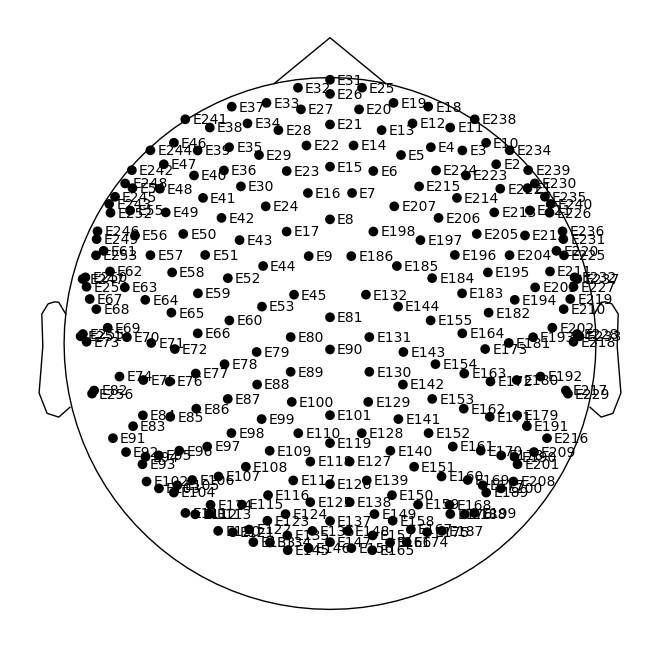

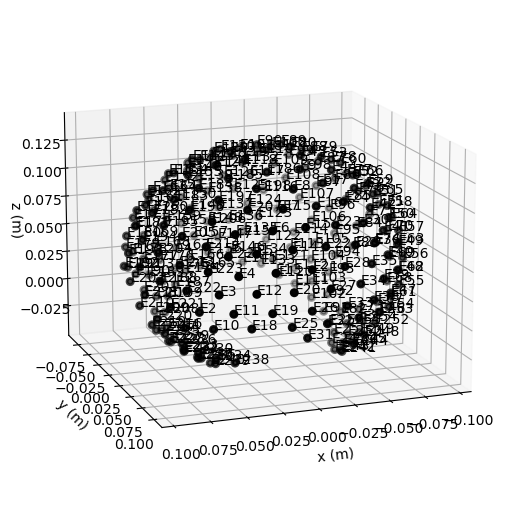

In [33]:
egi256_montage.plot()  # 2D
fig = egi256_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

In [34]:
ch_names = [f"E{n}" for n in range(1, 257)]
# ch_names = [str(n) for n in range(1, 257)]
ch_types = ["eeg"] * 256
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage("EGI_256",match_case=False,match_alias=False,on_missing='raise')
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 256 EEG
 custom_ref_applied: False
 dig: 259 items (3 Cardinal, 256 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 256
 projs: []
 sfreq: 200.0 Hz
>


In [35]:
info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [36]:
len(info['dig'])

259

In [37]:
info['dig'][2]

<DigPoint |        RPA : (80.0, 0.0, 0.0) mm       : head frame>

In [38]:
info['dig'][3]

<DigPoint |     EEG #1 : (72.9, 57.4, 4.9) mm      : head frame>

In [39]:
from hdf5storage import loadmat, savemat 
outdict=loadmat('egixyz')

In [40]:
outdict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Coordianates', 'x', 'y', 'z'])

In [41]:
Coordinates=outdict['Coordianates']/1000
x=outdict['x']/100
y=outdict['y']/100
z=outdict['z']/100

In [42]:
len(info['dig'])+1

260

In [43]:
for ch in range(3,len(info['dig'])):
    info['dig'][ch]['r']=Coordinates[ch-3,:]

In [44]:
info['dig'][3]

<DigPoint |     EEG #1 : (67.1, 47.8, 9.0) mm      : head frame>

In [45]:
info["description"] = "My egi dataset"
# info["bads"] = ["O1"]  # Names of bad channels
print(info)

<Info | 9 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 256 EEG
 custom_ref_applied: False
 description: My egi dataset
 dig: 259 items (3 Cardinal, 256 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 256
 projs: []
 sfreq: 200.0 Hz
>


In [59]:
# import data
from hdf5storage import loadmat, savemat 
outdict=loadmat('/Users/zhouz/GitHub/CAMCAN_MEG_100/FOQK20_20150722_1557.mat')
data=outdict['Data'][0:256,11000:12000]
data=data*0.000001


In [57]:
# # simulate data
# times = np.linspace(0, 200,num=200)
# freqs=range(256)
# amps=np.linspace(1,0,num=256)
# data=np.zeros((256,len(times)))
# for f in range(256):
#     # data[f,:]=0.00001*np.sin(freqs[f] * np.pi * times)
#     data[f,:]=amps[f] * 0.00001* np.sin(freqs[f] * np.pi * times)

In [ ]:
# times

In [25]:
data[90,:]

array([-6263.14013672, -6224.57421875, -6209.60205078, ...,
       -6238.39306641, -6249.78662109, -6278.55517578])

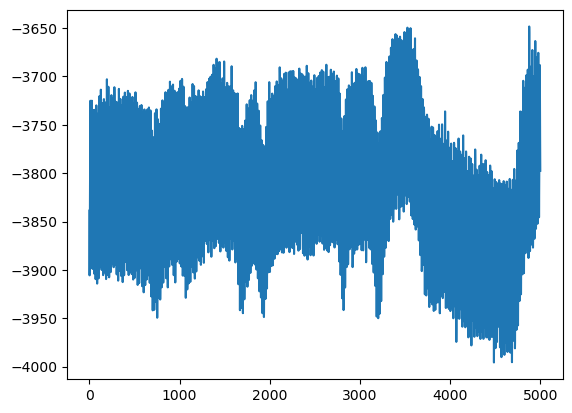

In [26]:
from matplotlib import pyplot as plt
plt.plot(data[112,:])

In [52]:
simulated_raw = mne.io.RawArray(data, info)
simulated_raw.plot(show_scrollbars=False, show_scalebars=False)

Creating RawArray with float64 data, n_channels=256, n_times=1000
    Range : 0 ... 999 =      0.000 ...     4.995 secs
Ready.


In [24]:
# rereferenced_raw, ref_data = mne.set_eeg_reference(simulated_raw, ref_channels='average', copy=False)
# fig_orig = simulated_raw.plot()
# fig_reref = rereferenced_raw.plot()

In [62]:
simulated_raw.set_eeg_reference('average', projection=True)



EEG channel type selected for re-referencing


C:\Users\zhouz\AppData\Local\Temp\ipykernel_35392\3436835830.py:1: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  simulated_raw.set_eeg_reference('average', projection=True)


<RawArray | 256 x 1000 (5.0 s), ~2.3 MB, data loaded>

In [92]:
# https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.save
simulated_raw.save("egi_raw.fif",overwrite=True)
# rereferenced_raw.save("egi_raw.fif",overwrite=True)


Overwriting existing file.
Writing c:\Users\zhouz\GitHub\MEG_EEG_Source_Localization\test_scripts\EEG_chan\egi_raw.fif
Closing c:\Users\zhouz\GitHub\MEG_EEG_Source_Localization\test_scripts\EEG_chan\egi_raw.fif
[done]


In [ ]:
# # simulate epoch data
# times = np.linspace(0, 1, sampling_freq, endpoint=False)
# nepoch = 5

# epochs_data = np.array(
#     [
#         [0.00001*np.sin(freqs[f] * np.pi * times)
#         for f in range(256)] 
#     for n in range(nepoch)
#     ]
# )



Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
You set the browser-backend to "qt" but your current version 0.0.0 of mne-qt-browser is too low for Epochs.Update with pip or conda.Defaults to matplotlib.
Using matplotlib as 2D backend.


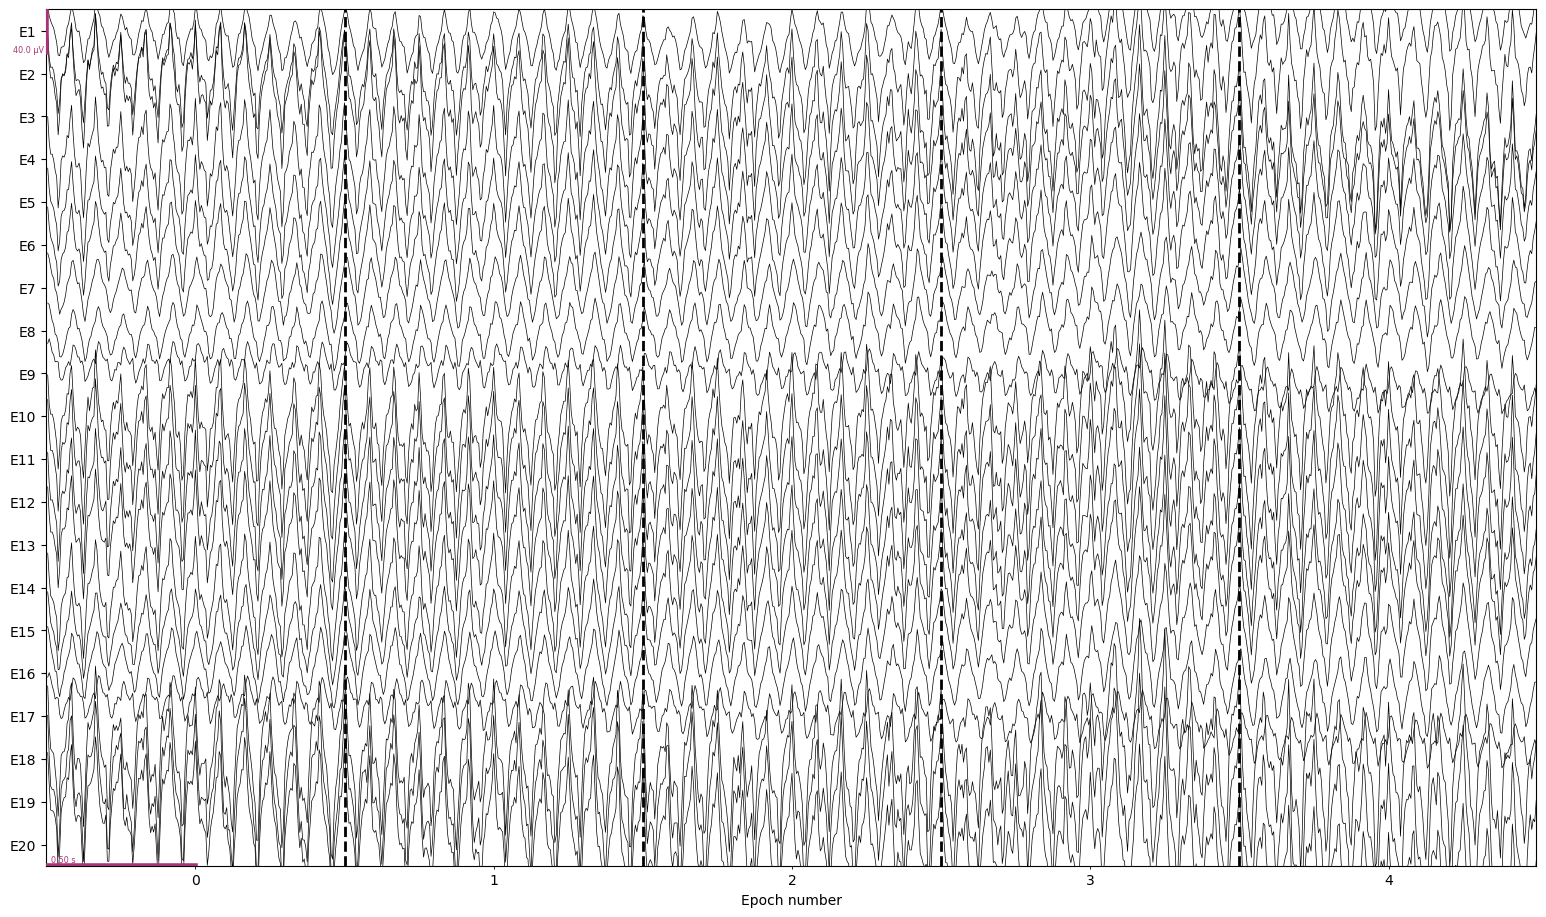

Using qt as 2D backend.


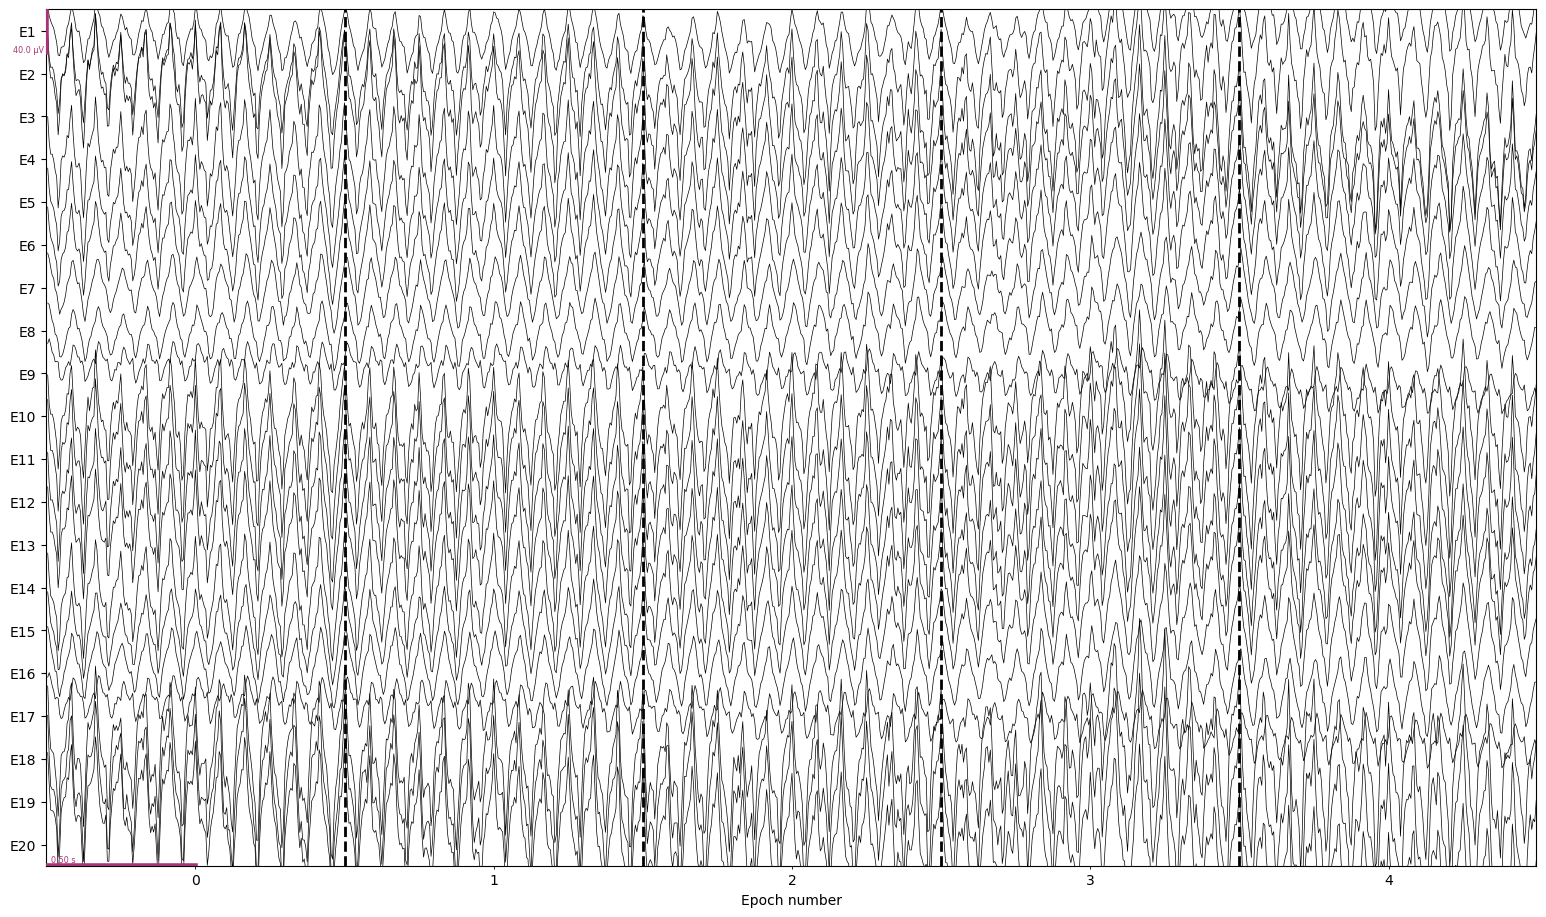

In [64]:
# simulate epoch data
nepoch = 5
epochs_data=np.zeros((nepoch,256,200))
for e in range(5):
    epochs_data[e,:,:]=data[:,200*e:200*e+200]

# create epoch array
simulated_epochs = mne.EpochsArray(epochs_data, info)
simulated_epochs.plot(picks="eeg", show_scrollbars=False)


In [68]:
simulated_epochs

<EpochsArray |  5 events (all good), 0 – 0.995 s, baseline off, ~2.3 MB, data loaded,
 '1': 5>

In [67]:
simulated_epochs.events
# https://mne.tools/stable/generated/mne.Epochs.html

array([[0, 0, 1],
       [1, 0, 1],
       [2, 0, 1],
       [3, 0, 1],
       [4, 0, 1]])

In [65]:
print(simulated_epochs.events[:, -1])

[1 1 1 1 1]


In [101]:
# https://mne.tools/stable/auto_tutorials/simulation/10_array_objs.html#sphx-glr-auto-tutorials-simulation-10-array-objs-py

events = np.column_stack(
    (
        np.arange(0, 1000, sampling_freq),
        np.zeros(5, dtype=int),
        np.array([1, 2, 1, 2, 1]),
    )
)
event_dict = dict(condition_A=1, condition_B=2)

events


array([[  0,   0,   1],
       [200,   0,   2],
       [400,   0,   1],
       [600,   0,   2],
       [800,   0,   1]])

In [98]:
# # testing events array
# https://www.nmr.mgh.harvard.edu/mne/0.14/auto_tutorials/plot_epoching_and_averaging.html

# events=np.array([[  0,   0,   1],
#        [200,   0,   2],
#        [400,   0,   1],
#        [600,   0,   2],
#        [650,   0,   1]])
# events

array([[  0,   0,   1],
       [200,   0,   2],
       [400,   0,   1],
       [600,   0,   2],
       [650,   0,   1]])

Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
You set the browser-backend to "qt" but your current version 0.0.0 of mne-qt-browser is too low for Epochs.Update with pip or conda.Defaults to matplotlib.
Using matplotlib as 2D backend.


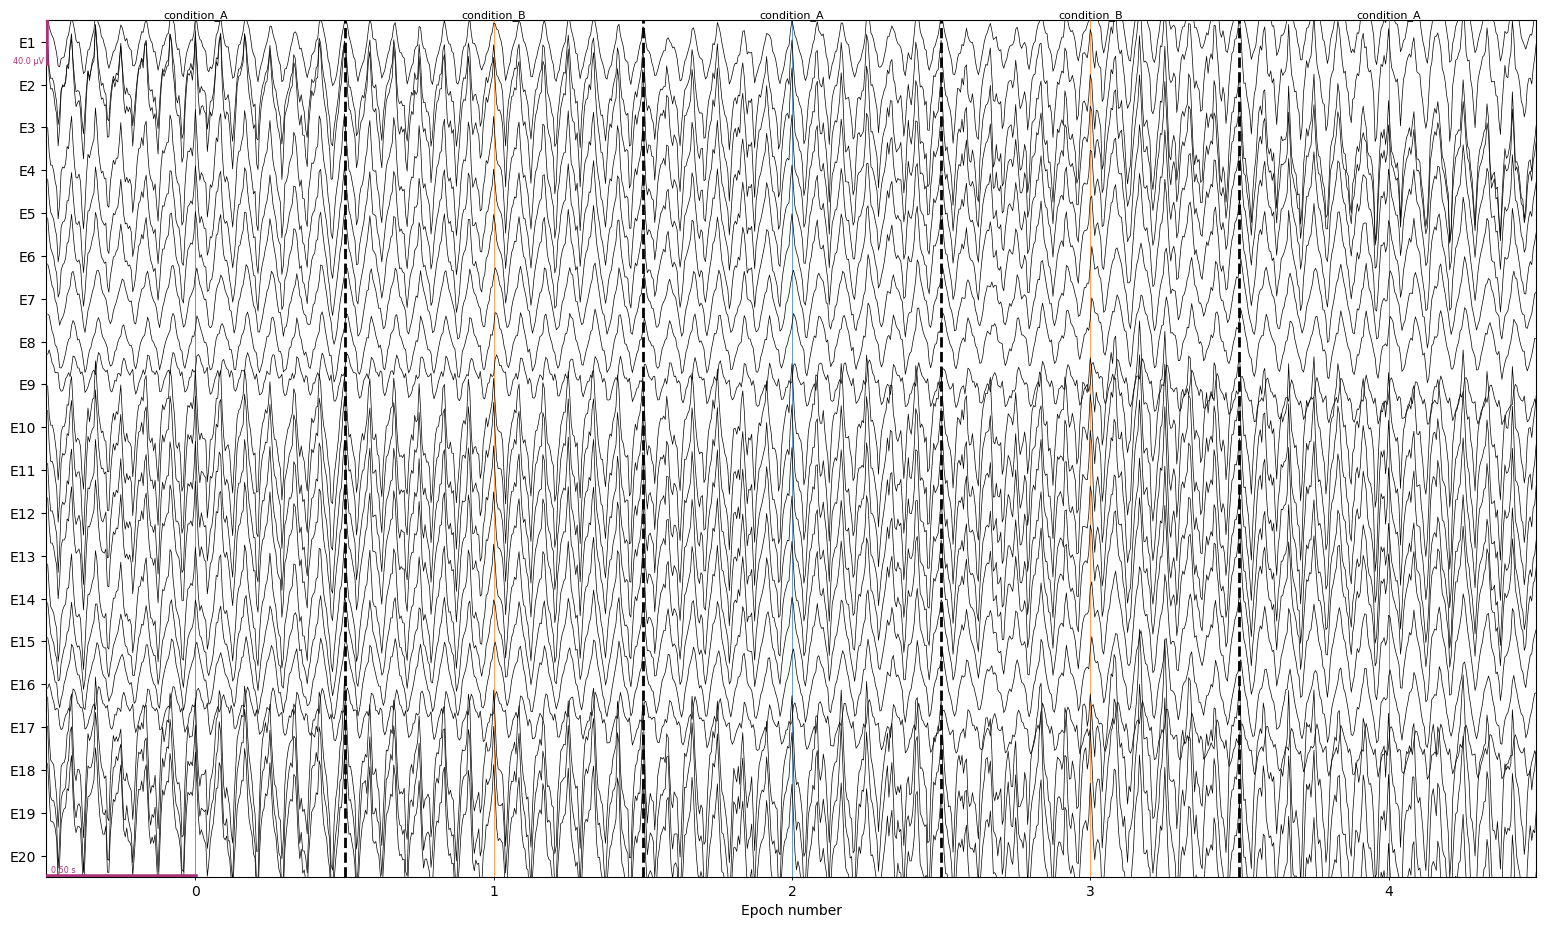

Using qt as 2D backend.


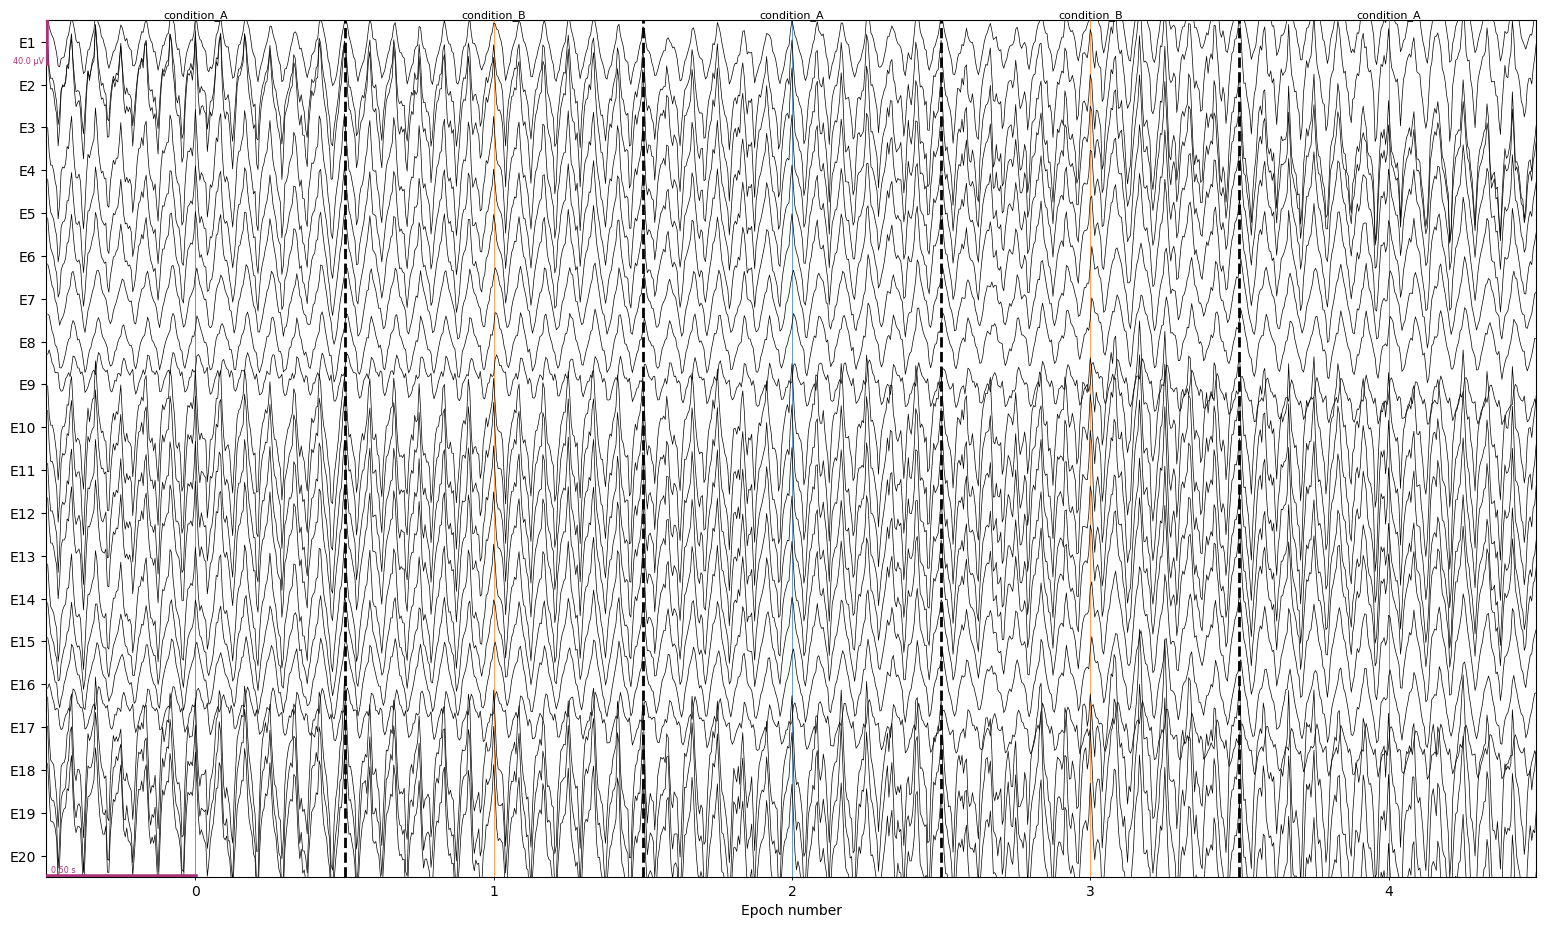

In [102]:
simulated_epochs = mne.EpochsArray(
    epochs_data, info, tmin=-0.5, events=events, event_id=event_dict
)
simulated_epochs.plot(
    picks="eeg", show_scrollbars=False, events=events, event_id=event_dict
)

<Evoked | 'simulated' (average, N=256), -0.5 – 0.495 s, baseline off, 256 ch, ~741 kB>


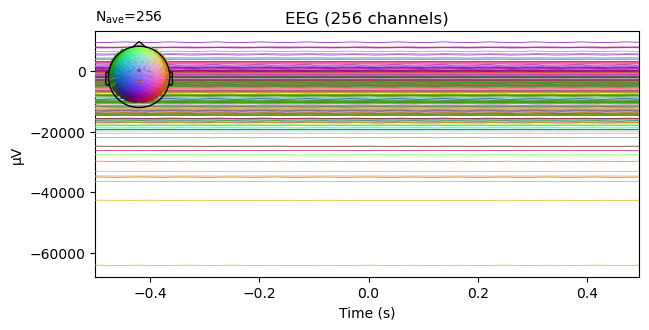

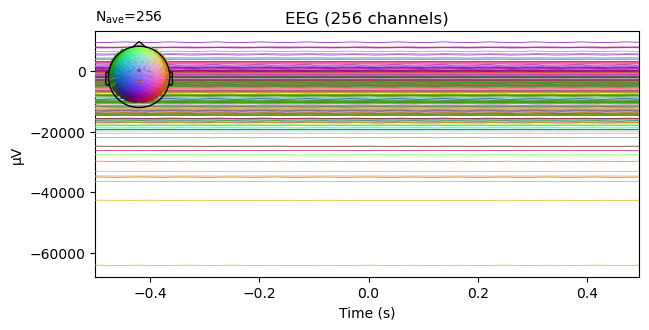

In [104]:
# Create the Evoked object
evoked_array = mne.EvokedArray(
    epochs_data.mean(axis=0), info, tmin=-0.5, nave=data.shape[0], comment="simulated"
)
print(evoked_array)
evoked_array.plot()

Effective window size : 0.640 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


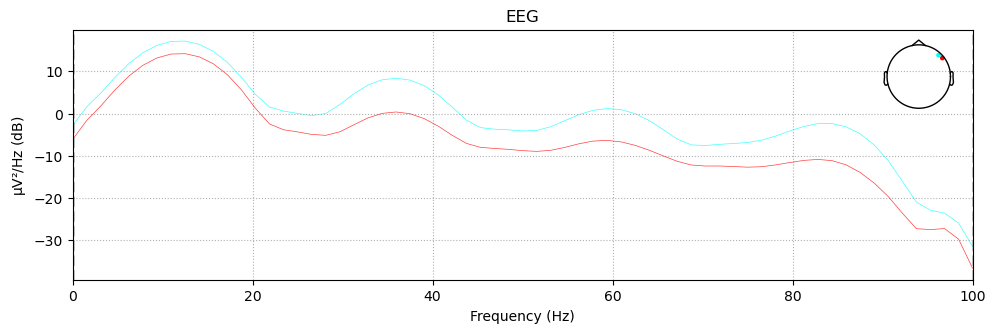

In [106]:
# compute power spectrum

psd, freqs = mne.time_frequency.psd_array_welch(
    epochs_data, info["sfreq"], n_fft=128, n_per_seg=32
)

psd_ave = psd.mean(0)

# map to `~mne.time_frequency.Spectrum` class and explore API


def spectrum_from_array(
    data: np.ndarray,  # spectral features
    freqs: np.ndarray,  # frequencies
    inst_info: mne.Info,  # the meta data of MNE instance
) -> mne.time_frequency.Spectrum:  # Spectrum object
    """Create MNE averaged power spectrum object from custom data"""
    state = dict(
        method="my_welch",
        data=data,
        sfreq=inst_info["sfreq"],
        dims=("channel", "freq"),
        freqs=freqs,
        inst_type_str="Raw",
        data_type="Averaged Power Spectrum",
        info=inst_info,
    )
    defaults = dict(
        method=None,
        fmin=None,
        fmax=None,
        tmin=None,
        tmax=None,
        picks=None,
        proj=None,
        reject_by_annotation=None,
        n_jobs=None,
        verbose=None,
    )
    return mne.time_frequency.Spectrum(state, **defaults)


spectrum = spectrum_from_array(data=psd_ave, freqs=freqs, inst_info=info)
spectrum.plot(picks=[0, 1], spatial_colors=True, exclude="bads")